### Импорт необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка файла

In [5]:
fandango = pd.read_csv('fandango_scrape.csv')
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


# 1. Изучение данных о сайте Fandango

In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


### Связь между популярностью фильма и его рейтингом

<Axes: xlabel='RATING', ylabel='VOTES'>

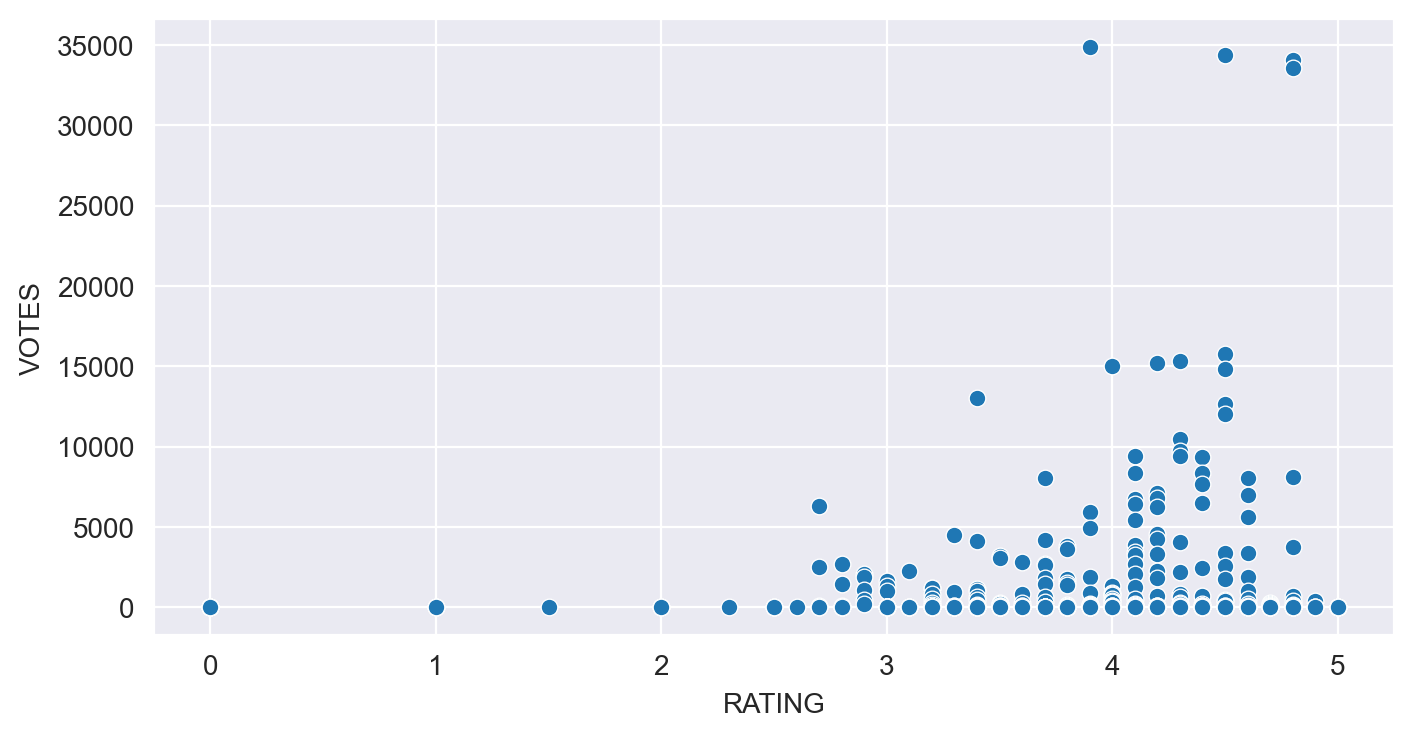

In [13]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=fandango, x='RATING', y='VOTES')

### Корреляция данных

In [11]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


### Добавляем колонку YEAR

In [14]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')', ''))
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


### Разбивка фильмов по годам

In [16]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

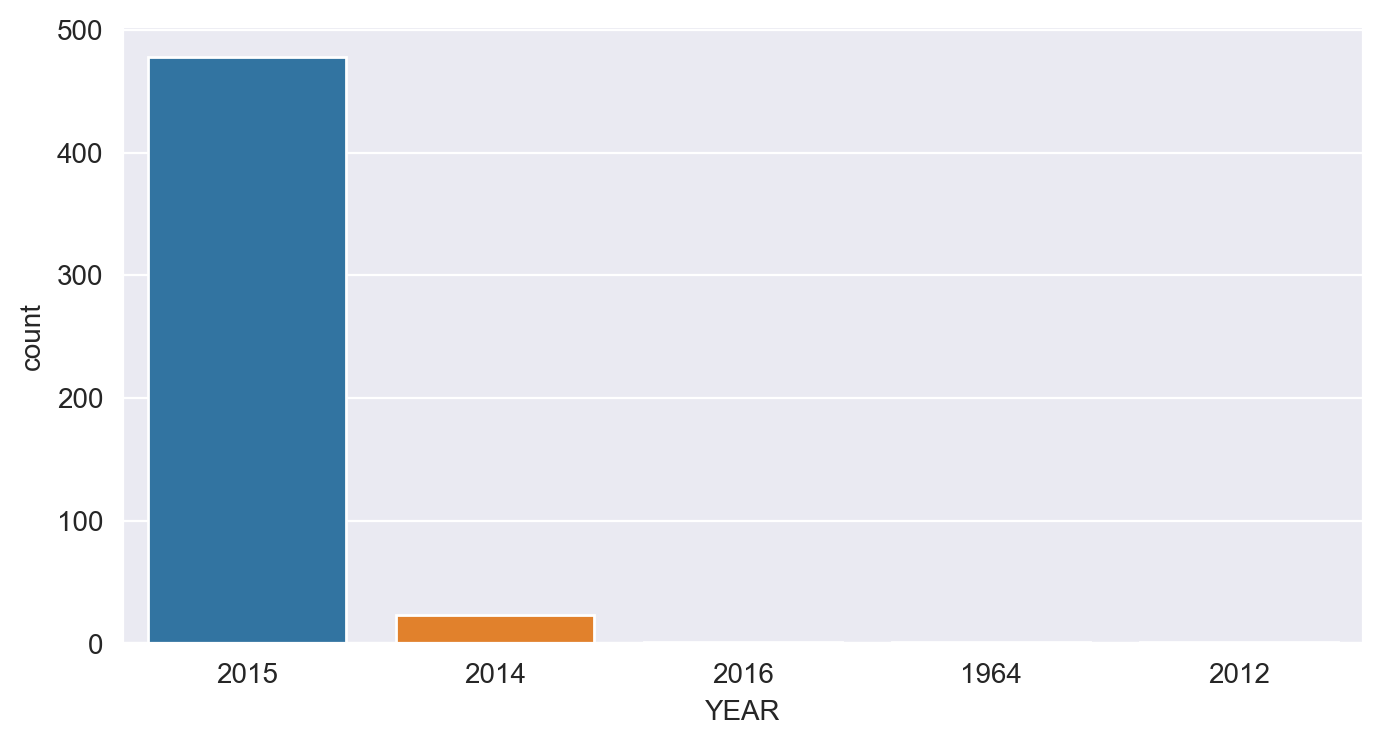

In [19]:
plt.figure(figsize=(8,4), dpi=200)
sns.countplot(data=fandango, x='YEAR', hue='YEAR')

### 10 фильмов с наибольшим количеством голосов

In [22]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


### Количество фильмов без голосов

In [24]:
len(fandango[fandango['VOTES'] == 0])

69

### Удаление фильмов с нулевым количеством голосов

In [26]:
fan_reviewed = fandango[fandango['VOTES'] > 0]

### График KDE plot, который отображает распределение отображаемых рейтингов (STARS) и истинных рейтингов на основе голосов пользователей (RATING).

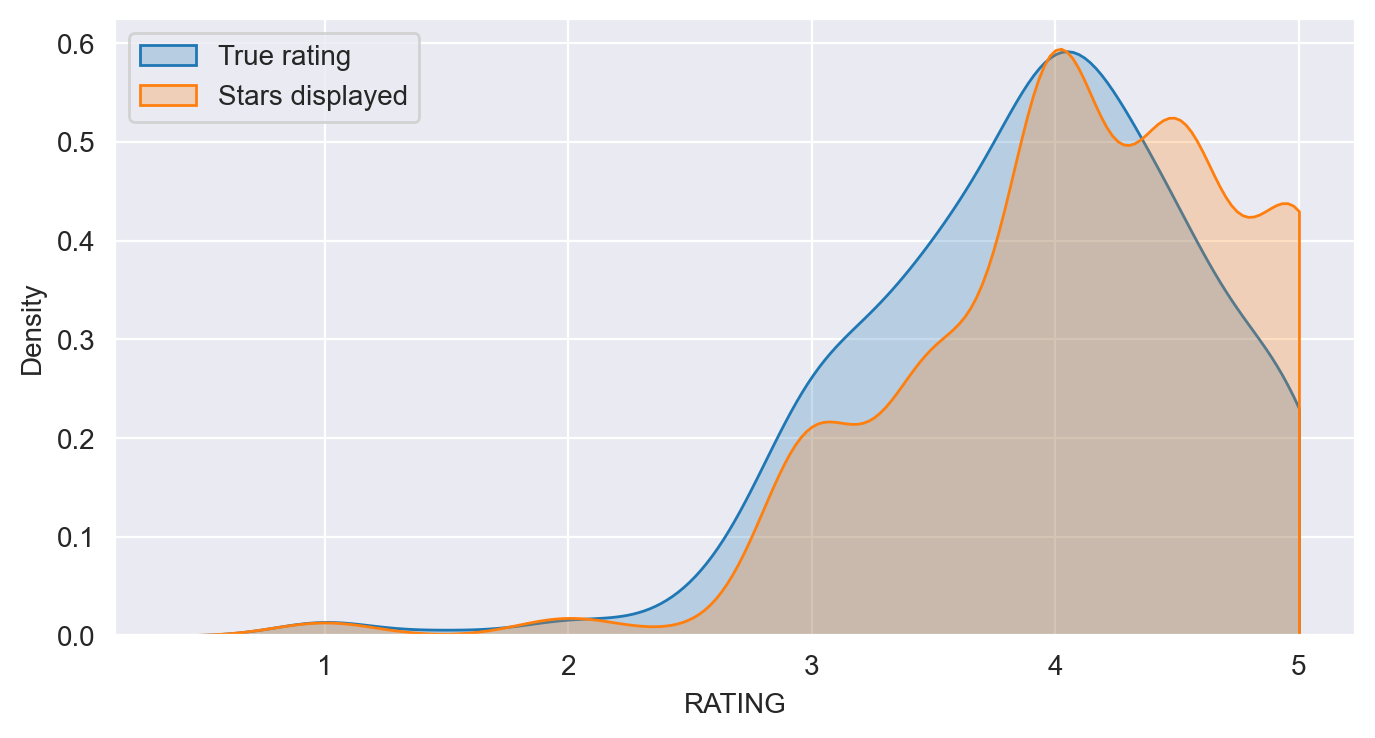

In [36]:
plt.figure(figsize=(8,4), dpi=200)
sns.kdeplot(data=fan_reviewed, x='RATING', fill=True, clip=[0, 5], label='True rating')
sns.kdeplot(data=fan_reviewed, x='STARS', fill=True, clip=[0, 5], label='Stars displayed')
plt.legend()

### Pазница в численном виде между колонками STARS и RATING

In [37]:
fan_reviewed['STARS_DIF'] = round(fan_reviewed['STARS'] - fandango['RATING'], 1)
fan_reviewed.head()

C:\Users\solo\AppData\Local\Temp\ipykernel_11328\2216292749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIF'] = round(fan_reviewed['STARS'] - fandango['RATING'], 1)


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


<Axes: xlabel='STARS_DIF', ylabel='count'>

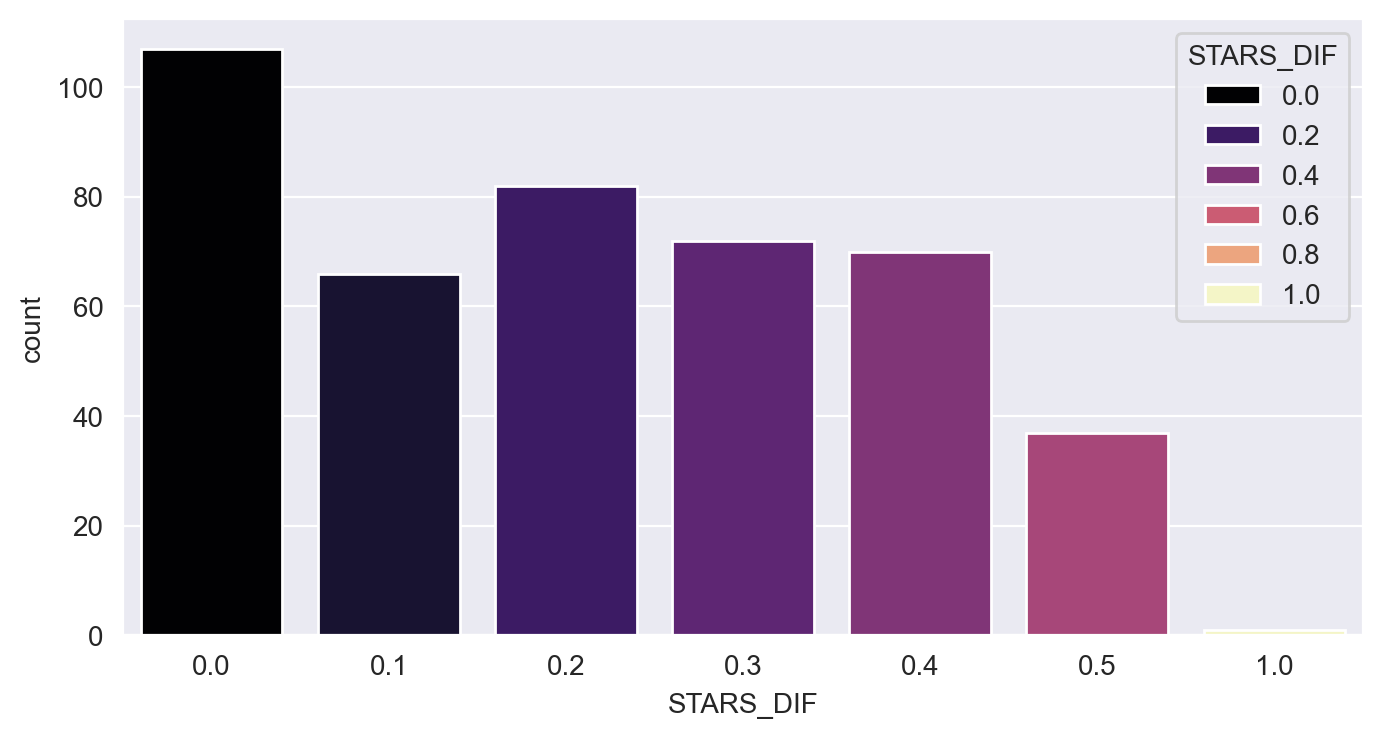

In [40]:
plt.figure(figsize=(8,4), dpi=200)
sns.countplot(data=fan_reviewed, x='STARS_DIF', hue='STARS_DIF', palette='magma')

### Фильм, в котором разница в рейтинге равна единице

In [42]:
fan_reviewed[fan_reviewed['STARS_DIF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


# 2. Изучение данных о рейтингах других компаний

### Загрузка данных

In [43]:
all_sites = pd.read_csv('all_sites_scores.csv')
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [45]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


## Рейтинги от Rotten Tomatoes и Rotten Tomatoes User

### График scatterplot, изображающий для Rotten Tomatoes связь между рейтингами от критиков и пользовательскими рейтингами

(0.0, 100.0)

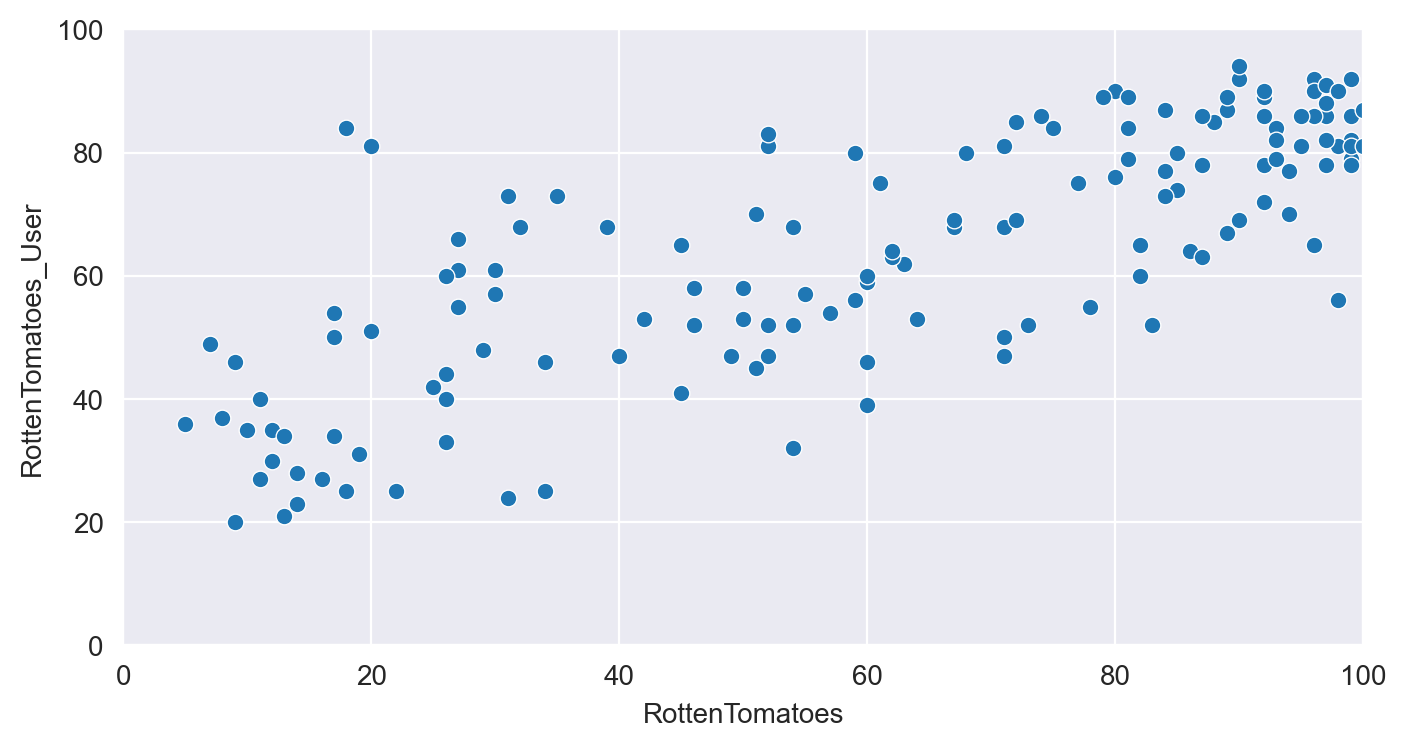

In [48]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')
plt.xlim(0, 100)
plt.ylim(0, 100)

### Pазница в численном виде между колонками RottenTomatoes-RottenTomatoes_User.

In [49]:
all_sites['Rotten_Diff'] = round(all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User'], 1)
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


### Средняя абсолютная разница между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes

In [50]:
all_sites['Rotten_Diff'].apply(abs).mean()

np.float64(15.095890410958905)

### График распределения разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

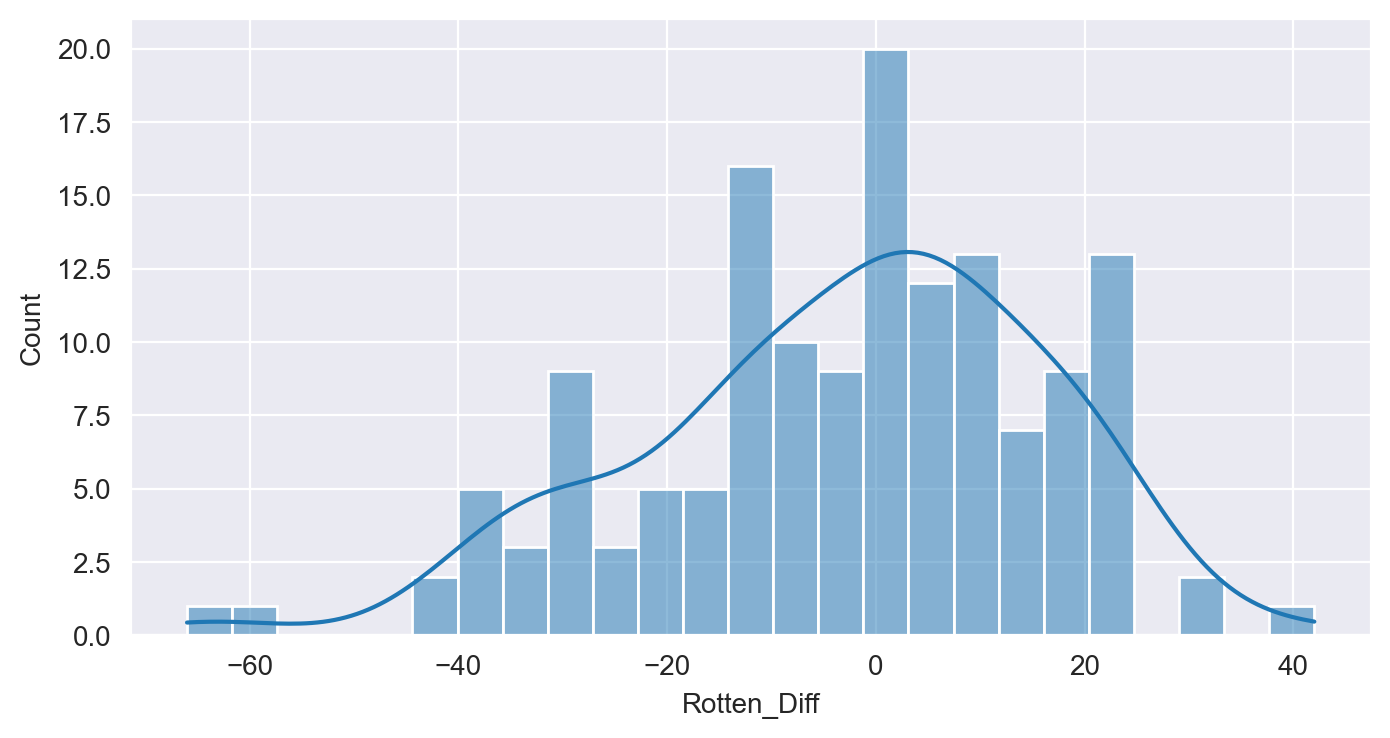

In [53]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(data=all_sites, x='Rotten_Diff', kde=True, bins=25)

### График распределения *абсолютных значений* разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes.

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

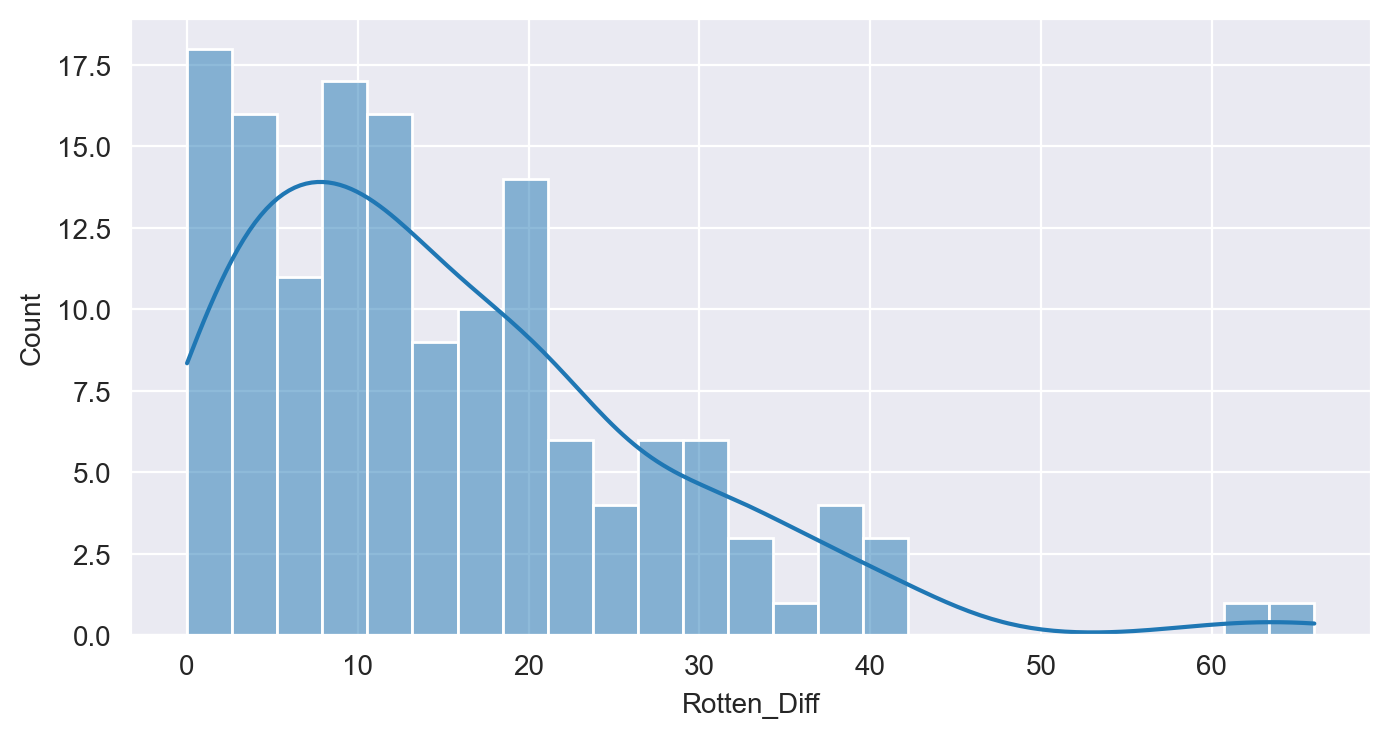

In [55]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs), kde=True, bins=25)

### 5 фильмов, которые в среднем были  выше всего оценены пользователями, по сравнению с оценками от критиков:

In [56]:
all_sites.nsmallest(5, 'Rotten_Diff')[['FILM', 'Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


### 5 фильмов, которые в среднем были выше всего оценены критиками, по сравнению с оценками от пользователей

In [57]:
all_sites.nlargest(5, 'Rotten_Diff')[['FILM', 'Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## Рейтинги от Metacritic и Metacritic User

### График scatterplot для сравнения рейтингов Metacritic и Metacritic User.

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

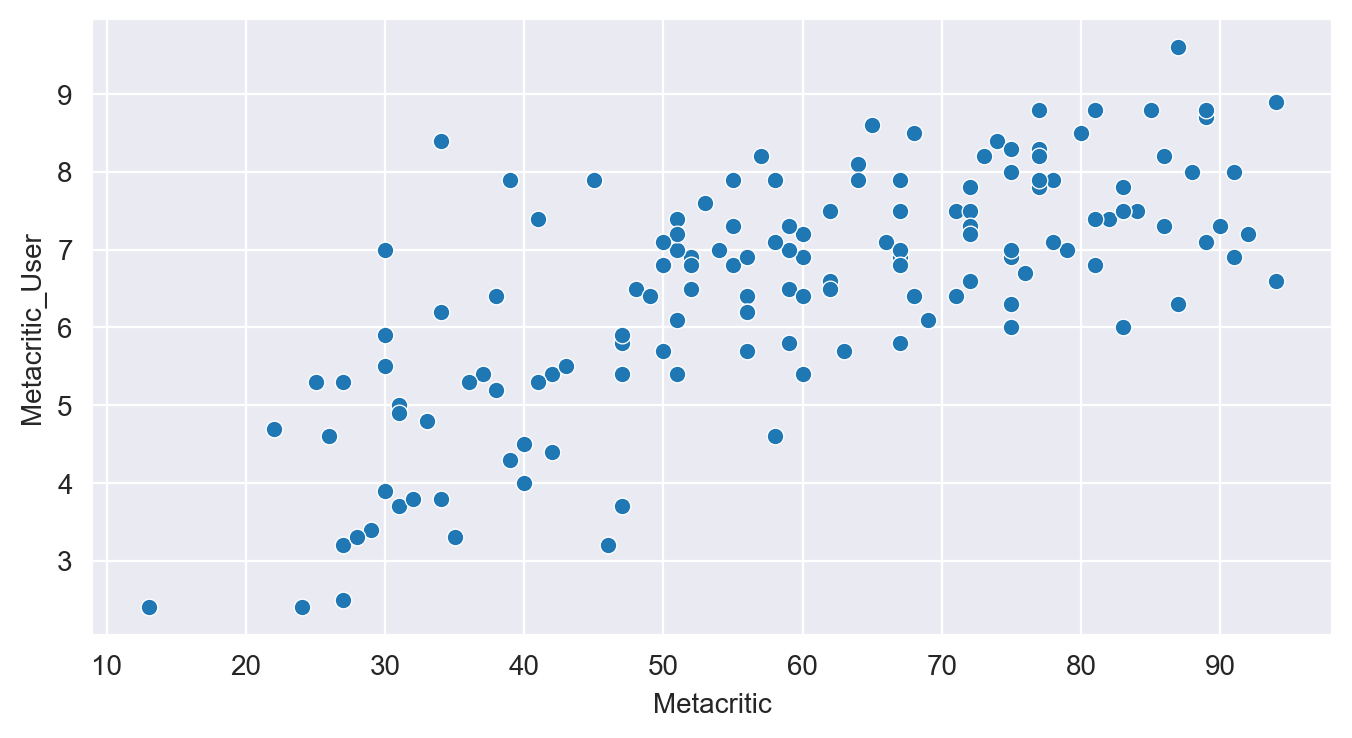

In [58]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')

## Рейтинги от IMDB

### График scatterplot для изображения связи между количеством голосов на MetaCritic и количеством голосов на IMDB.

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

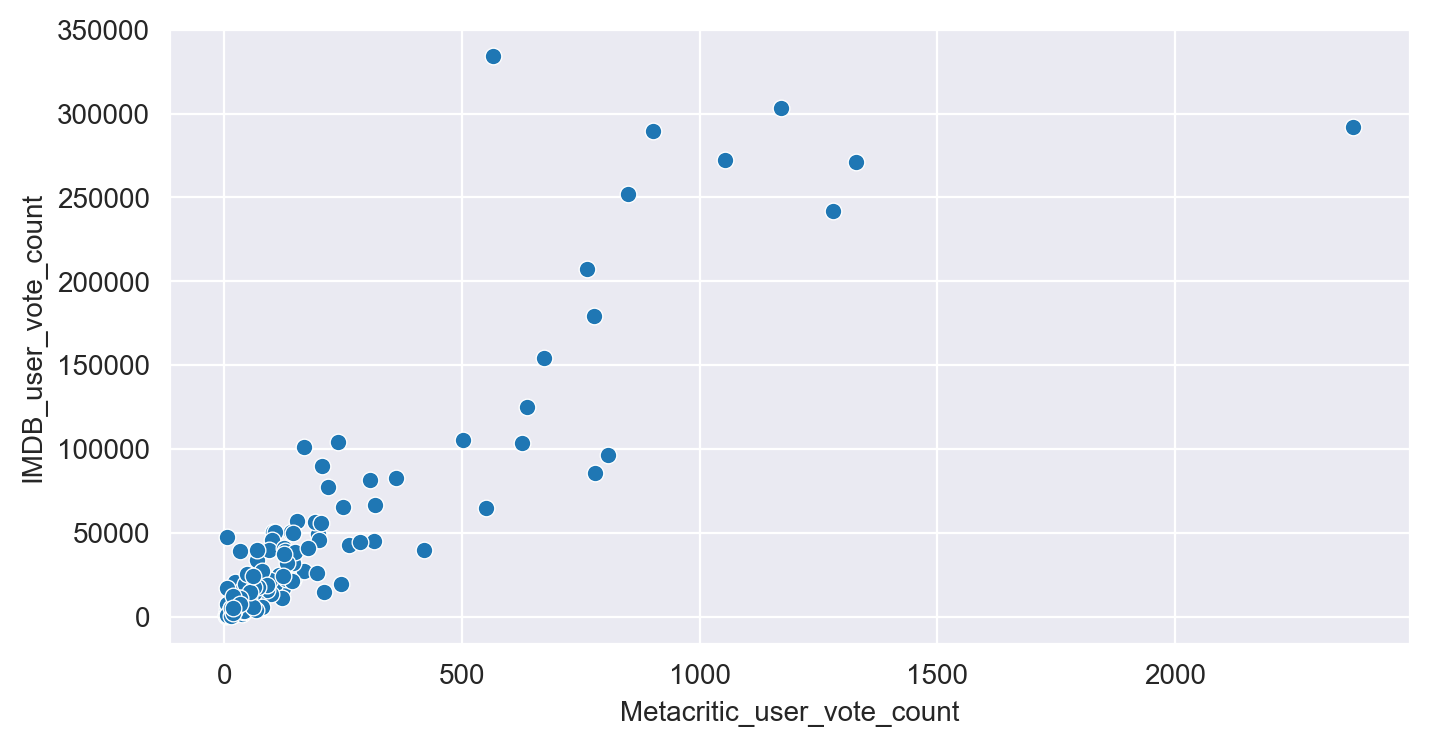

In [60]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

# Сравнение рейтингов Fandango с рейтингами других компаний

### Объединение таблицы fandango с таблицей all_sites

In [64]:
df = pd.merge(fandango, all_sites, on='FILM', how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


## Нормализация колонок до диапазона 0-5 в соответствии с колонками STARS и RATINGS от Fandango

In [66]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

In [67]:
df['RT_Norm'] = np.round(df['RottenTomatoes'] / 20, 1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User'] / 20, 1)

In [68]:
df['Meta_Norm'] = np.round(df['Metacritic'] / 20, 1)
df['Meta_U_Norm'] = np.round(df['Metacritic_User'] / 2, 1)

In [69]:
df['IMDB_Norm'] = np.round(df['IMDB'] / 2, 1)

In [70]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


### DataFrame с названием norm_scores, в котором останутся только нормализованные рейтинги

In [71]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff',
       'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm'],
      dtype='object')

In [72]:
norm_scores = df[['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Сравнение распределений рейтингов от разных компаний

<Axes: ylabel='Density'>

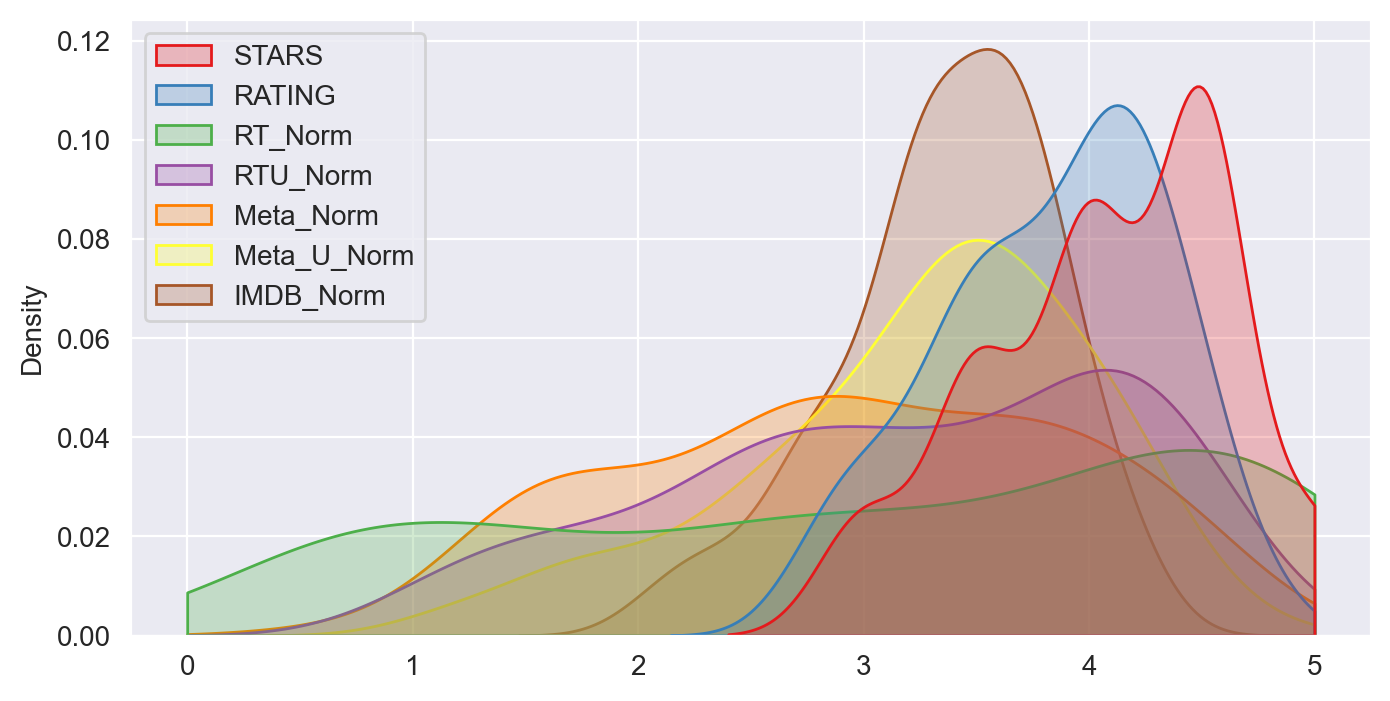

In [78]:
plt.figure(figsize=(8,4), dpi=200)
sns.kdeplot(data=norm_scores, fill=True, clip=[0, 5], palette='Set1')

### График KDE plot, сравнивающий распределение рейтингов Rotten Tomatoes от критиков и распределение рейтингов STARS от Fandango.

<Axes: ylabel='Density'>

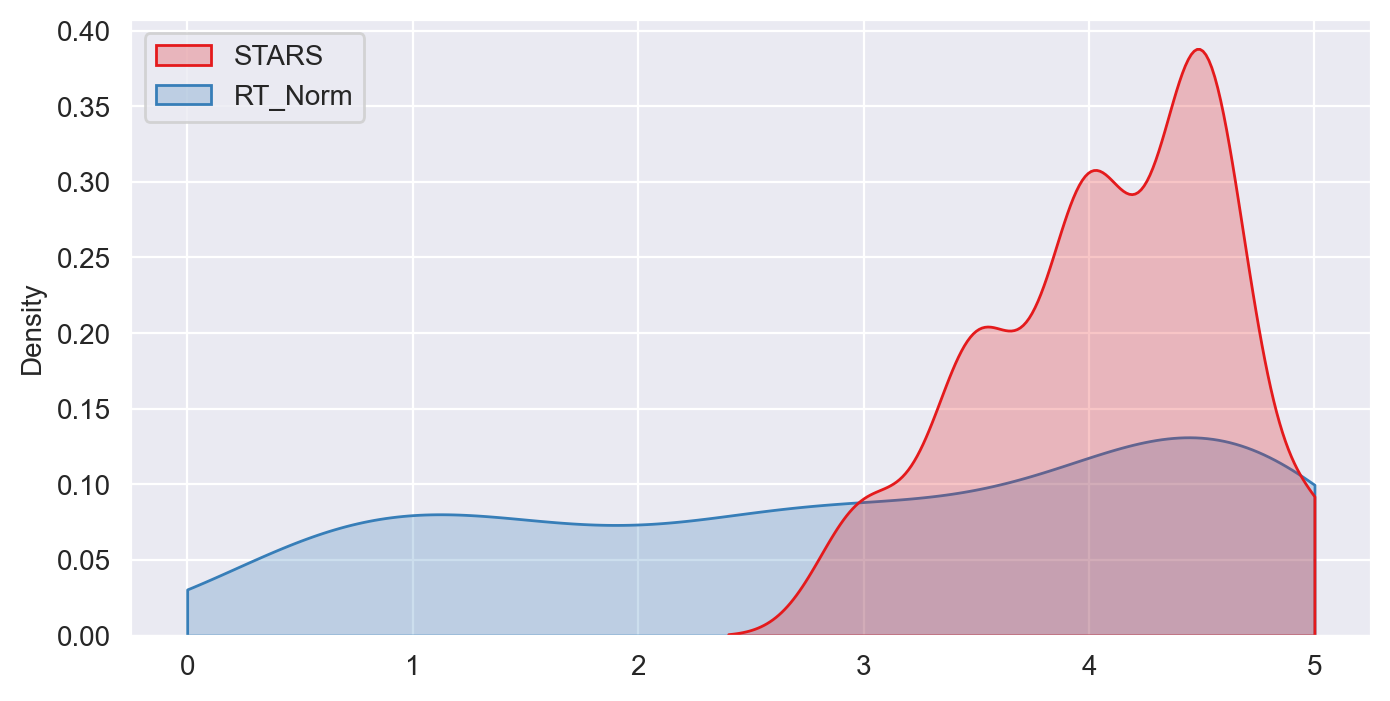

In [79]:
plt.figure(figsize=(8,4), dpi=200)
sns.kdeplot(data=norm_scores[['STARS', 'RT_Norm']], fill=True, clip=[0, 5], palette='Set1')

### График histplot, сравнивающий все нормализованные рейтинги.

<Axes: ylabel='Count'>

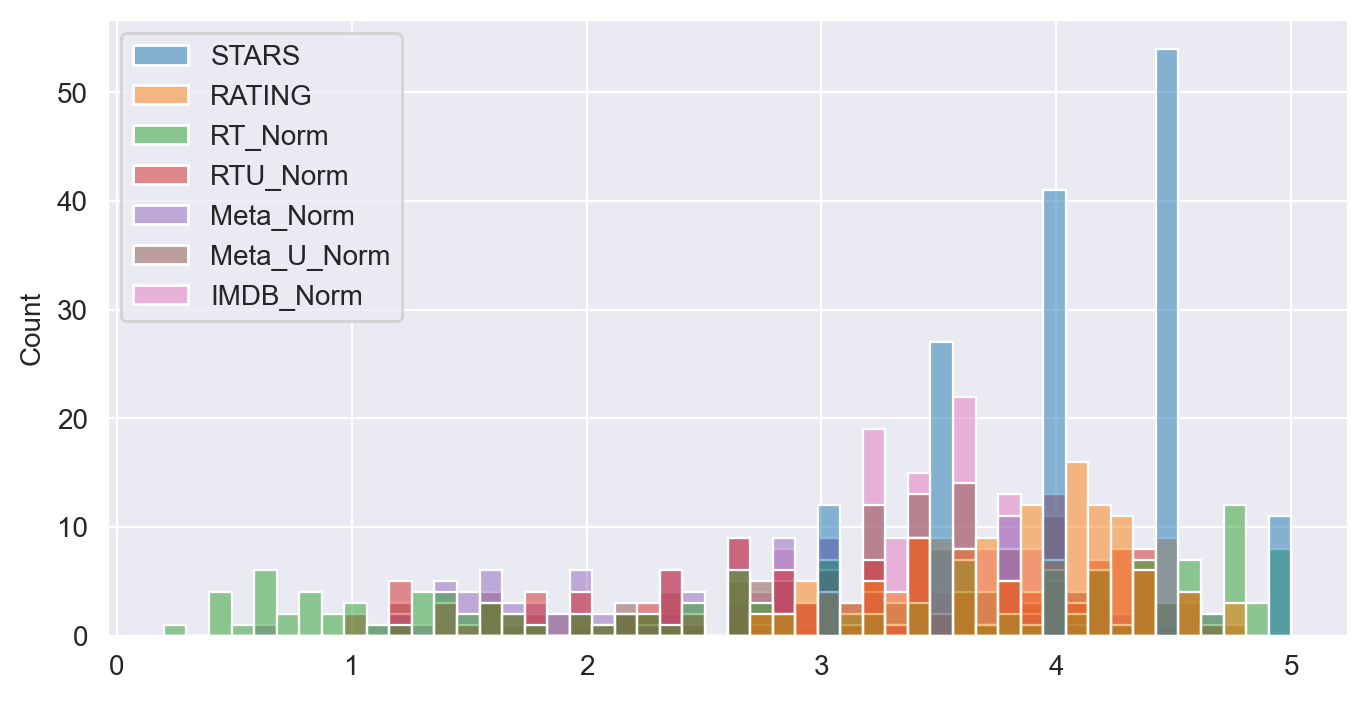

In [82]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(data=norm_scores, bins=50)